In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('../embedding/embedding-append.csv')

# Convert to a list of strings of floats
matrix = np.array(df.embedding.apply(eval).to_list())

In [3]:
from sklearn.manifold import TSNE

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=2, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape

(6, 2)

Text(0.5, 1.0, 'TikTok hearing YouTube video transcripts visualized using t-SNE')

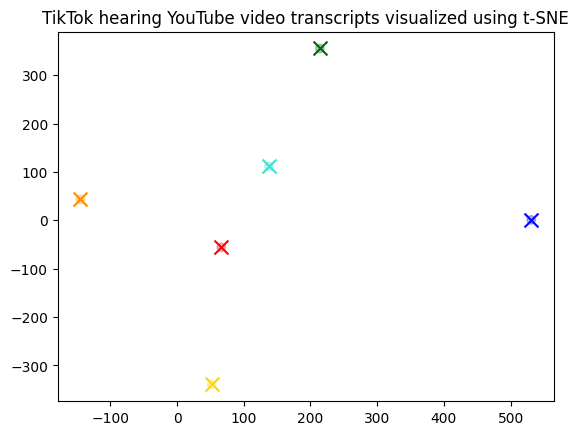

In [5]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Visualize the data in a scatter plot.
colors = ["red", "darkorange", "gold", "turquoise", "darkgreen", "blue"]
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]
color_indices = [i for i in range(len(df.name.values))]

colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
for i, name in enumerate(df.name.values):
    avg_x = np.array(x)[df.name==name].mean()
    avg_y = np.array(y)[df.name==name].mean()
    color = colors[i]
    plt.scatter(avg_x, avg_y, marker='x', color=color, s=100)

plt.title("TikTok hearing YouTube video transcripts visualized using t-SNE")